<a href="https://colab.research.google.com/github/akshayabhale1406/SCLR_Delhivery_FE/blob/main/Delhivery_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Case: Delhivery - Feature Engineering**

## Problem Statement : About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

 **Approach to understanding the problem and getting to insights**

First we will understand the data we have received, and then check what possible operation we can do to analyse the data better and observe patterns to provide solutions.

### Importing the relevant libraries

In [485]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Loading CSV as Dataset

In [486]:
df = pd.read_csv("/content/sample_data/delhivery_data.csv")



### Checking if the data is loaded as dataframe

In [487]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9.0,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18.0,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27.0,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36.0,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39.0,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Checking the shape of the data

In [488]:
df.shape

(13669, 24)

### Checking column name

In [489]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

**OBSERVATION**: This data consists of 144867 checkpoints described across 24 columns.


### Checking data type of each column

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13669 entries, 0 to 13668
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            13669 non-null  object 
 1   trip_creation_time              13669 non-null  object 
 2   route_schedule_uuid             13669 non-null  object 
 3   route_type                      13669 non-null  object 
 4   trip_uuid                       13669 non-null  object 
 5   source_center                   13669 non-null  object 
 6   source_name                     13625 non-null  object 
 7   destination_center              13669 non-null  object 
 8   destination_name                13634 non-null  object 
 9   od_start_time                   13668 non-null  object 
 10  od_end_time                     13668 non-null  object 
 11  start_scan_to_end_scan          13668 non-null  float64
 12  is_cutoff                       

**OBSERVATION**: The time column should be of correct datatype, that is: datetime

### Convert the od_start_time and od_end_time to datetime data type

In [491]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13669 entries, 0 to 13668
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            13669 non-null  object        
 1   trip_creation_time              13669 non-null  datetime64[ns]
 2   route_schedule_uuid             13669 non-null  object        
 3   route_type                      13669 non-null  object        
 4   trip_uuid                       13669 non-null  object        
 5   source_center                   13669 non-null  object        
 6   source_name                     13625 non-null  object        
 7   destination_center              13669 non-null  object        
 8   destination_name                13634 non-null  object        
 9   od_start_time                   13668 non-null  datetime64[ns]
 10  od_end_time                     13668 non-null  datetime64[ns]
 11  st

### Checking for missing vaules in column

In [493]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,44
destination_center,0
destination_name,35
od_start_time,1


**OBSERVATION**: There are missing values in  columns: source_name, destination_name, and segment factor. Since the missing values are less than 1% of the total data, we can directly drop the NULL values.



### Dropping the NULL values from the dataset

In [494]:
df = df.dropna(how ='any')

### Checking the shape of data after dropping NULL Values

In [495]:
df.shape

(13590, 24)

**OBSERVATION**: The new dataset is decreased by less than 1% of the actual raw dataset. This is acceptable for further Data Analysis.

In [496]:
df_null_check = df.isnull().sum()

### Checking to see if there are any NULL values in the new dataset.

In [497]:
df_null_check

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


**OBSERVATION**: No NULL values in the new dataset.

### Checking the statistical summary of raw data

In [498]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,13590,13590,13590,13590.000000,13590.000000,13590.000000,13590.000000,13590.000000,13590.000000,13590.000000,13590.000000,13590.000000,13590.000000,13590.000000
mean,2018-09-22 14:22:53.385970432,2018-09-22 18:41:19.097126144,2018-09-23 08:13:36.266300160,811.788815,195.772038,196.838386,348.123915,181.072627,239.874495,2.092776,35.447903,18.027962,22.109852,2.242828
min,2018-09-12 00:25:19.499696,2018-09-12 00:39:30.747127,2018-09-12 01:32:05.649177,25.000000,9.000000,9.000267,9.000000,6.000000,9.101900,0.250000,-26.000000,0.000000,0.000000,-1.857143
25%,2018-09-17 03:18:31.933782016,2018-09-17 05:58:41.932416,2018-09-17 20:58:30.455497984,142.000000,22.000000,22.790967,48.000000,25.000000,28.210250,1.586721,19.000000,11.000000,11.634800,1.352941
50%,2018-09-22 04:51:35.609723904,2018-09-22 14:28:00.361435904,2018-09-23 00:58:48.076965888,374.000000,45.000000,47.365088,111.000000,55.000000,65.215400,1.851417,28.000000,17.000000,23.208050,1.705882
75%,2018-09-27 20:02:15.692121088,2018-09-28 02:05:46.084299008,2018-09-28 12:10:34.435962880,1125.000000,220.000000,220.042783,389.000000,194.000000,257.000975,2.230769,40.000000,22.000000,27.372575,2.277778
max,2018-10-03 23:59:42.701692,2018-10-04 07:25:09.837533,2018-10-05 19:05:53.844442,3341.000000,1722.000000,1722.009755,3031.000000,1611.000000,2191.166400,77.387097,2297.000000,383.000000,439.604700,574.250000
std,NaN,NaN,NaN,919.145084,310.651764,310.854020,522.261620,279.097659,381.160604,1.403325,48.762409,12.577406,14.608491,7.154479


### Checking if any orders are returned to source location.

In [499]:
returned_orders = df.groupby("trip_uuid").apply(lambda group: pd.DataFrame({"Returned_Packages": [any(group["source_center"] == group["destination_center"])]})).reset_index()
returned_orders.head()

<ipython-input-499-887a70d66ffd>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  returned_orders = df.groupby("trip_uuid").apply(lambda group: pd.DataFrame({"Returned_Packages": [any(group["source_center"] == group["destination_center"])]})).reset_index()


,trip_uuid,level_1,Returned_Packages
0,trip-153671191949943656,0,False
1,trip-153671237597058150,0,False
2,trip-153671262893947351,0,False
3,trip-153671277074687197,0,False
4,trip-153671320807895983,0,False


In [500]:
true_instances = returned_orders[returned_orders['Returned_Packages'] == True].index.tolist()
true_instances

[]

**OBSERVATION**: The below shows if any values are TRUE for Returned_Packages. Since the returned list is empty, it means no packages were returned.

### The current details are split for different trips as per different check-points for that trips. Data can be analysed better if the times of each check-points can be summed up for each trip ID.

In [501]:
df_combined_times = df.groupby("trip_uuid")[["segment_actual_time", "segment_osrm_time", "segment_osrm_distance"]].sum()
df_combined_times["segment_osrm_distance"] = np.round(df_combined_times["segment_osrm_distance"], 2)
df_combined_times = df_combined_times.rename(columns = {"segment_osrm_time" : "accumulated_osrm_time", "segment_actual_time" : "accumulated_actual_time", "segment_osrm_distance" : "accumulated_osrm_distance"})
df_combined_times.head()

,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance
trip_uuid,,,
trip-153671191949943656,252.0,132.0,140.56
trip-153671237597058150,240.0,49.0,56.76
trip-153671262893947351,195.0,26.0,30.46
trip-153671277074687197,299.0,329.0,198.97
trip-153671320807895983,142.0,55.0,80.15


In [502]:
df_combined_times_1 = df.groupby(["trip_uuid","destination_center"])[["actual_time", "osrm_time", "osrm_distance"]].last()
df_combined_times_1 = df_combined_times_1.reset_index()
df_combined_times_1 = df_combined_times_1.groupby("trip_uuid")[["actual_time", "osrm_time", "osrm_distance"]].sum()
df_combined_times_1.head()

,actual_time,osrm_time,osrm_distance
trip_uuid,,,
trip-153671191949943656,253.0,105.0,124.5063
trip-153671237597058150,241.0,33.0,46.9087
trip-153671262893947351,195.0,26.0,30.4646
trip-153671277074687197,301.0,329.0,197.6186
trip-153671320807895983,145.0,57.0,79.9793


### Calculation of time difference between OSRM time and Actual Time to know how much time error present present in the OSRM time calculation.

In [503]:
df_combined_times_1 = df_combined_times_1.reset_index()
df_combined_times = pd.merge(df_combined_times, df_combined_times_1, on = "trip_uuid")
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance
0,trip-153671191949943656,252.0,132.0,140.56,253.0,105.0,124.5063
1,trip-153671237597058150,240.0,49.0,56.76,241.0,33.0,46.9087
2,trip-153671262893947351,195.0,26.0,30.46,195.0,26.0,30.4646
3,trip-153671277074687197,299.0,329.0,198.97,301.0,329.0,197.6186
4,trip-153671320807895983,142.0,55.0,80.15,145.0,57.0,79.9793


In [504]:
od_start_time = df.groupby('trip_uuid')['od_start_time'].first()
od_start_time = od_start_time.reset_index()
od_start_time = od_start_time.rename(columns={'od_start_time': 'trip_start_time'})
df_combined_times = df_combined_times.merge(od_start_time, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times["trip_start_date"] = df_combined_times["trip_start_time"].dt.date
trip_start_location = df.groupby('trip_uuid')['source_name'].first()
trip_end_location = df.groupby('trip_uuid')['destination_name'].last()
trip_end_location = trip_end_location.reset_index()
trip_start_location = trip_start_location.reset_index()
df_combined_times = df_combined_times.merge(trip_start_location, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times = df_combined_times.merge(trip_end_location, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times = df_combined_times.drop(columns=['trip_start_time'])
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name
0,trip-153671191949943656,252.0,132.0,140.56,253.0,105.0,124.5063,2018-09-12,Narsinghpur_KndliDPP_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh)
1,trip-153671237597058150,240.0,49.0,56.76,241.0,33.0,46.9087,2018-09-12,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam)
2,trip-153671262893947351,195.0,26.0,30.46,195.0,26.0,30.4646,2018-09-12,Hyderabad_North_D_2 (Telangana),Hyderabad_Alwal_I (Telangana)
3,trip-153671277074687197,299.0,329.0,198.97,301.0,329.0,197.6186,2018-09-12,Dindigul_Central_D_1 (Tamil Nadu),Vadipatti_lalaNGR_D (Tamil Nadu)
4,trip-153671320807895983,142.0,55.0,80.15,145.0,57.0,79.9793,2018-09-12,FBD_Balabhgarh_DPC (Haryana),FBD_Balabhgarh_DPC (Haryana)


In [505]:
od_start_time = df.groupby('trip_uuid')['od_start_time'].first()
od_start_time = od_start_time.reset_index()
od_start_time = od_start_time.rename(columns={'od_start_time': 'trip_start_time'})
df_combined_times = df_combined_times.merge(od_start_time, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time
0,trip-153671191949943656,252.0,132.0,140.56,253.0,105.0,124.5063,2018-09-12,Narsinghpur_KndliDPP_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),2018-09-12 04:33:09.726898
1,trip-153671237597058150,240.0,49.0,56.76,241.0,33.0,46.9087,2018-09-12,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam),2018-09-12 03:48:42.530167
2,trip-153671262893947351,195.0,26.0,30.46,195.0,26.0,30.4646,2018-09-12,Hyderabad_North_D_2 (Telangana),Hyderabad_Alwal_I (Telangana),2018-09-12 01:05:52.573005
3,trip-153671277074687197,299.0,329.0,198.97,301.0,329.0,197.6186,2018-09-12,Dindigul_Central_D_1 (Tamil Nadu),Vadipatti_lalaNGR_D (Tamil Nadu),2018-09-12 00:39:30.747127
4,trip-153671320807895983,142.0,55.0,80.15,145.0,57.0,79.9793,2018-09-12,FBD_Balabhgarh_DPC (Haryana),FBD_Balabhgarh_DPC (Haryana),2018-09-12 00:46:48.079257


### Creating a column for Starting Point and Ending Point of a trip using States names

In [506]:
df_combined_times["source_name"] = df_combined_times["source_name"].str.split("(").str[1]
df_combined_times["source_name"] = df_combined_times["source_name"].str.split(")").str[0]
df_combined_times["source_name"] = df_combined_times["source_name"].apply(lambda x : x.upper())
df_combined_times["destination_name"] = df_combined_times["destination_name"].str.split("(").str[1]
df_combined_times["destination_name"] = df_combined_times["destination_name"].str.split(")").str[0]
df_combined_times["destination_name"] = df_combined_times["destination_name"].apply(lambda x : x.upper())
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time
0,trip-153671191949943656,252.0,132.0,140.56,253.0,105.0,124.5063,2018-09-12,MADHYA PRADESH,MADHYA PRADESH,2018-09-12 04:33:09.726898
1,trip-153671237597058150,240.0,49.0,56.76,241.0,33.0,46.9087,2018-09-12,ASSAM,ASSAM,2018-09-12 03:48:42.530167
2,trip-153671262893947351,195.0,26.0,30.46,195.0,26.0,30.4646,2018-09-12,TELANGANA,TELANGANA,2018-09-12 01:05:52.573005
3,trip-153671277074687197,299.0,329.0,198.97,301.0,329.0,197.6186,2018-09-12,TAMIL NADU,TAMIL NADU,2018-09-12 00:39:30.747127
4,trip-153671320807895983,142.0,55.0,80.15,145.0,57.0,79.9793,2018-09-12,HARYANA,HARYANA,2018-09-12 00:46:48.079257


In [507]:
od_start = df.groupby('trip_uuid')['od_start_time'].first()
od_end = df.groupby('trip_uuid')['od_end_time'].last()
df_combined_times = df_combined_times.set_index('trip_uuid').merge(od_start, left_index=True, right_index=True).reset_index()
df_combined_times = df_combined_times.set_index('trip_uuid').merge(od_end, left_index=True, right_index=True).reset_index()
df_combined_times["trip_duration"] = (df_combined_times["od_end_time"] - df_combined_times["od_start_time"]).dt.total_seconds()/60
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time,od_start_time,od_end_time,trip_duration
0,trip-153671191949943656,252.0,132.0,140.56,253.0,105.0,124.5063,2018-09-12,MADHYA PRADESH,MADHYA PRADESH,2018-09-12 04:33:09.726898,2018-09-12 04:33:09.726898,2018-09-12 09:23:49.463096,290.662270
1,trip-153671237597058150,240.0,49.0,56.76,241.0,33.0,46.9087,2018-09-12,ASSAM,ASSAM,2018-09-12 03:48:42.530167,2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.076999
2,trip-153671262893947351,195.0,26.0,30.46,195.0,26.0,30.4646,2018-09-12,TELANGANA,TELANGANA,2018-09-12 01:05:52.573005,2018-09-12 01:05:52.573005,2018-09-12 05:35:54.020732,270.024129
3,trip-153671277074687197,299.0,329.0,198.97,301.0,329.0,197.6186,2018-09-12,TAMIL NADU,TAMIL NADU,2018-09-12 00:39:30.747127,2018-09-12 00:39:30.747127,2018-09-12 07:32:54.425056,413.394632
4,trip-153671320807895983,142.0,55.0,80.15,145.0,57.0,79.9793,2018-09-12,HARYANA,HARYANA,2018-09-12 00:46:48.079257,2018-09-12 00:46:48.079257,2018-09-12 05:07:14.232558,260.435888


In [508]:
df_start_t_to_end_t = df.groupby("trip_uuid")["start_scan_to_end_scan"].last()
df_start_t_to_end_t = df_start_t_to_end_t.reset_index()
df_combined_times = df_combined_times.merge(df_start_t_to_end_t, on = "trip_uuid")
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time,od_start_time,od_end_time,trip_duration,start_scan_to_end_scan
0,trip-153671191949943656,252.0,132.0,140.56,253.0,105.0,124.5063,2018-09-12,MADHYA PRADESH,MADHYA PRADESH,2018-09-12 04:33:09.726898,2018-09-12 04:33:09.726898,2018-09-12 09:23:49.463096,290.662270,204.0
1,trip-153671237597058150,240.0,49.0,56.76,241.0,33.0,46.9087,2018-09-12,ASSAM,ASSAM,2018-09-12 03:48:42.530167,2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.076999,252.0
2,trip-153671262893947351,195.0,26.0,30.46,195.0,26.0,30.4646,2018-09-12,TELANGANA,TELANGANA,2018-09-12 01:05:52.573005,2018-09-12 01:05:52.573005,2018-09-12 05:35:54.020732,270.024129,210.0
3,trip-153671277074687197,299.0,329.0,198.97,301.0,329.0,197.6186,2018-09-12,TAMIL NADU,TAMIL NADU,2018-09-12 00:39:30.747127,2018-09-12 00:39:30.747127,2018-09-12 07:32:54.425056,413.394632,47.0
4,trip-153671320807895983,142.0,55.0,80.15,145.0,57.0,79.9793,2018-09-12,HARYANA,HARYANA,2018-09-12 00:46:48.079257,2018-09-12 00:46:48.079257,2018-09-12 05:07:14.232558,260.435888,193.0


In [509]:
df_route_type = df.groupby("trip_uuid")["route_type"].first()
df_route_type.reset_index()
df_combined_times = df_combined_times.merge(df_route_type, on = "trip_uuid")
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time,od_start_time,od_end_time,trip_duration,start_scan_to_end_scan,route_type
0,trip-153671191949943656,252.0,132.0,140.56,253.0,105.0,124.5063,2018-09-12,MADHYA PRADESH,MADHYA PRADESH,2018-09-12 04:33:09.726898,2018-09-12 04:33:09.726898,2018-09-12 09:23:49.463096,290.662270,204.0,FTL
1,trip-153671237597058150,240.0,49.0,56.76,241.0,33.0,46.9087,2018-09-12,ASSAM,ASSAM,2018-09-12 03:48:42.530167,2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.076999,252.0,Carting
2,trip-153671262893947351,195.0,26.0,30.46,195.0,26.0,30.4646,2018-09-12,TELANGANA,TELANGANA,2018-09-12 01:05:52.573005,2018-09-12 01:05:52.573005,2018-09-12 05:35:54.020732,270.024129,210.0,Carting
3,trip-153671277074687197,299.0,329.0,198.97,301.0,329.0,197.6186,2018-09-12,TAMIL NADU,TAMIL NADU,2018-09-12 00:39:30.747127,2018-09-12 00:39:30.747127,2018-09-12 07:32:54.425056,413.394632,47.0,FTL
4,trip-153671320807895983,142.0,55.0,80.15,145.0,57.0,79.9793,2018-09-12,HARYANA,HARYANA,2018-09-12 00:46:48.079257,2018-09-12 00:46:48.079257,2018-09-12 05:07:14.232558,260.435888,193.0,Carting


In [510]:
df_combined_times = df_combined_times.loc[:, ['trip_uuid', 'route_type', 'source_name', 'trip_start_date', 'destination_name', 'od_end_time', 'trip_duration', 'start_scan_to_end_scan', 'actual_time', 'accumulated_actual_time', 'osrm_time', 'accumulated_osrm_time', 'osrm_distance', 'accumulated_osrm_distance']]
df_combined_times["od_end_time"] = df_combined_times["od_end_time"].dt.date
df_combined_times = df_combined_times.rename(columns = {"od_end_time" : "trip_end_date"})
df_combined_times.head()

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671191949943656,FTL,MADHYA PRADESH,2018-09-12,MADHYA PRADESH,2018-09-12,290.662270,204.0,253.0,252.0,105.0,132.0,124.5063,140.56
1,trip-153671237597058150,Carting,ASSAM,2018-09-12,ASSAM,2018-09-12,252.076999,252.0,241.0,240.0,33.0,49.0,46.9087,56.76
2,trip-153671262893947351,Carting,TELANGANA,2018-09-12,TELANGANA,2018-09-12,270.024129,210.0,195.0,195.0,26.0,26.0,30.4646,30.46
3,trip-153671277074687197,FTL,TAMIL NADU,2018-09-12,TAMIL NADU,2018-09-12,413.394632,47.0,301.0,299.0,329.0,329.0,197.6186,198.97
4,trip-153671320807895983,Carting,HARYANA,2018-09-12,HARYANA,2018-09-12,260.435888,193.0,145.0,142.0,57.0,55.0,79.9793,80.15


In [511]:
most_busy_days = df_combined_times['trip_start_date'].value_counts().sort_index()
most_busy_days

,count
trip_start_date,
2018-09-12,70
2018-09-13,70
2018-09-14,64
2018-09-15,90
2018-09-16,65
2018-09-17,82
2018-09-18,71
2018-09-19,53
2018-09-20,74


[Text(0.5, 0, 'Number of trips'),
 Text(0, 0.5, 'Trip Date'),
 Text(0.5, 1.0, 'Plot of Number of Trip v/s Trip Date')]

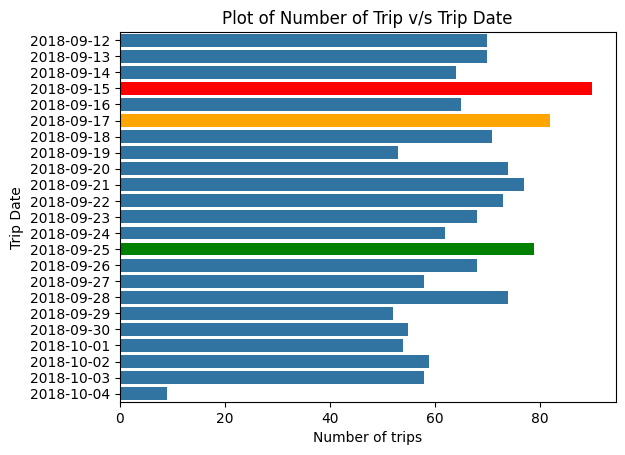

In [512]:
most_busy_days = df_combined_times['trip_start_date'].value_counts().sort_index().reset_index()
most_busy_day = sns.barplot(data = most_busy_days, x = "count", y = "trip_start_date")
bars = most_busy_day.patches
bars[3].set_facecolor("red")
bars[5].set_facecolor("orange")
bars[13].set_facecolor("green")
most_busy_day.set(xlabel ="Number of trips", ylabel = "Trip Date", title ='Plot of Number of Trip v/s Trip Date')

In [513]:
df_top_10_center = df["source_center"].value_counts().head(13)

df_top_10_destination_center = df["destination_center"].value_counts().head(13)

df_most_busy_center = df_top_10_center.reset_index().merge(df_top_10_destination_center.reset_index(), left_on="source_center", right_on="destination_center")

df_most_busy_center = df_most_busy_center.rename(columns={"source_center": "Center_Code"})

df_most_busy_center = df_most_busy_center.drop(columns=["destination_center"])

df_most_busy_center = df_most_busy_center.rename(columns = {"count_x" : "source_center", "count_y" : "destination_center"})

df_most_busy_center

,Center_Code,source_center,destination_center
0,IND000000ACB,2123,1210
1,IND562132AAA,778,801
2,IND421302AAG,693,607
3,IND411033AAA,355,441
4,IND501359AAE,316,555
5,IND560099AAB,246,191
6,IND131028AAB,217,292
7,IND600056AAB,203,163
8,IND160002AAC,197,336
9,IND712311AAA,183,364


<Axes: xlabel='Center_Code'>

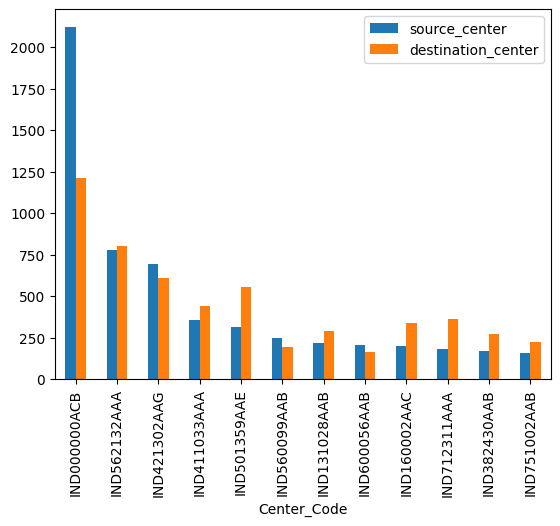

In [514]:
df_most_busy_center.plot(x = "Center_Code", y=["source_center", "destination_center"], kind="bar")

In [515]:
df_top_10_city = df_combined_times["source_name"].value_counts().head(10)

df_top_10_destination_name = df_combined_times["destination_name"].value_counts().head(10)

df_most_busy_city = df_top_10_city.reset_index().merge(df_top_10_destination_name.reset_index(), left_on="source_name", right_on="destination_name")

df_most_busy_city = df_most_busy_city.rename(columns={"source_name": "city_name"})

df_most_busy_city = df_most_busy_city.drop(columns=["destination_name"])

df_most_busy_city = df_most_busy_city.rename(columns = {"count_x" : "from_city", "count_y" : "to_city"})

df_most_busy_city

,city_name,from_city,to_city
0,MAHARASHTRA,262,263
1,KARNATAKA,240,241
2,HARYANA,167,150
3,TAMIL NADU,106,103
4,TELANGANA,76,85
5,DELHI,74,65
6,UTTAR PRADESH,68,75
7,GUJARAT,67,76
8,PUNJAB,65,76
9,WEST BENGAL,64,66


<Axes: xlabel='city_name'>

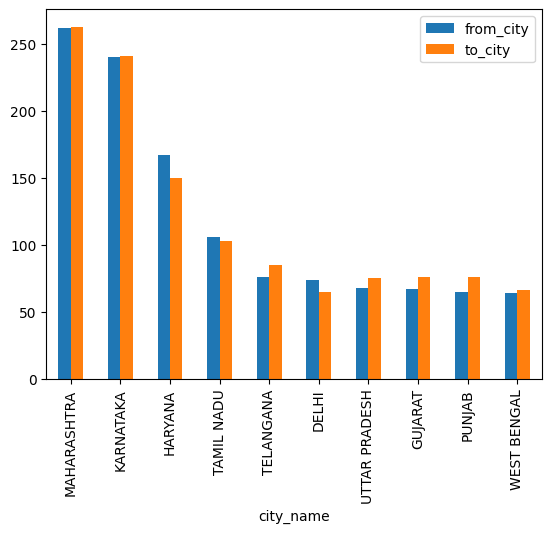

In [516]:
df_most_busy_city.plot(x = "city_name", y=["from_city", "to_city"], kind="bar")

In [517]:
df_bottom_10_city = df_combined_times["source_name"].value_counts().tail(13)

df_bottom_10_destination_name = df_combined_times["destination_name"].value_counts().tail(13)

df_least_busy_city = df_bottom_10_city.reset_index().merge(df_bottom_10_destination_name.reset_index(), left_on="source_name", right_on="destination_name")

df_least_busy_city = df_least_busy_city.rename(columns={"source_name": "city_name"})

df_least_busy_city = df_least_busy_city.drop(columns=["destination_name"])

df_least_busy_city = df_least_busy_city.rename(columns = {"count_x" : "from_city", "count_y" : "to_city"})

df_least_busy_city

,city_name,from_city,to_city
0,ASSAM,24,21
1,JHARKHAND,14,14
2,ORISSA,13,13
3,UTTARAKHAND,11,14
4,GOA,7,6
5,HIMACHAL PRADESH,5,3
6,CHANDIGARH,5,2
7,CHHATTISGARH,2,2
8,JAMMU & KASHMIR,2,1
9,PONDICHERRY,2,2


<Axes: xlabel='city_name'>

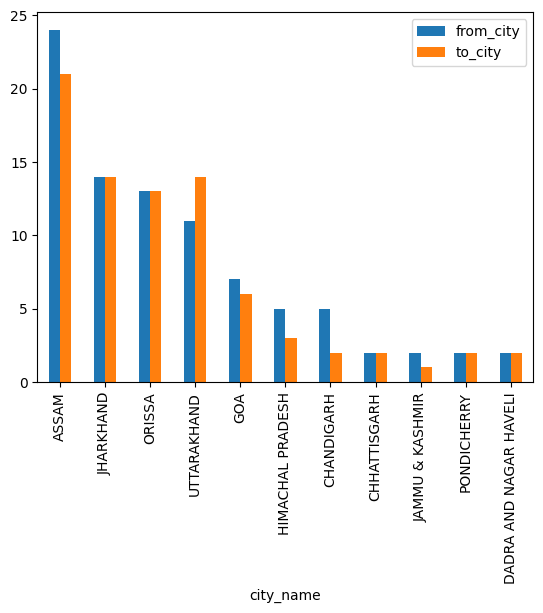

In [518]:
df_least_busy_city.plot(x = "city_name", y=["from_city", "to_city"], kind="bar")

## HYPOTHESIS TESTING:

1) Testing if the difference trip_duration and start_scan_to_end_scan is significant using **TWO SAMPLE T-TEST**

In [519]:
df_combined_times.head()

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671191949943656,FTL,MADHYA PRADESH,2018-09-12,MADHYA PRADESH,2018-09-12,290.662270,204.0,253.0,252.0,105.0,132.0,124.5063,140.56
1,trip-153671237597058150,Carting,ASSAM,2018-09-12,ASSAM,2018-09-12,252.076999,252.0,241.0,240.0,33.0,49.0,46.9087,56.76
2,trip-153671262893947351,Carting,TELANGANA,2018-09-12,TELANGANA,2018-09-12,270.024129,210.0,195.0,195.0,26.0,26.0,30.4646,30.46
3,trip-153671277074687197,FTL,TAMIL NADU,2018-09-12,TAMIL NADU,2018-09-12,413.394632,47.0,301.0,299.0,329.0,329.0,197.6186,198.97
4,trip-153671320807895983,Carting,HARYANA,2018-09-12,HARYANA,2018-09-12,260.435888,193.0,145.0,142.0,57.0,55.0,79.9793,80.15


In [520]:
df_hypo_test1 = df_combined_times.copy()
df_hypo_test1["diff_trip_duration_scan"] = df_hypo_test1["trip_duration"] - df_hypo_test1["start_scan_to_end_scan"]
df_hypo_test1.head()

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
0,trip-153671191949943656,FTL,MADHYA PRADESH,2018-09-12,MADHYA PRADESH,2018-09-12,290.662270,204.0,253.0,252.0,105.0,132.0,124.5063,140.56,86.662270
1,trip-153671237597058150,Carting,ASSAM,2018-09-12,ASSAM,2018-09-12,252.076999,252.0,241.0,240.0,33.0,49.0,46.9087,56.76,0.076999
2,trip-153671262893947351,Carting,TELANGANA,2018-09-12,TELANGANA,2018-09-12,270.024129,210.0,195.0,195.0,26.0,26.0,30.4646,30.46,60.024129
3,trip-153671277074687197,FTL,TAMIL NADU,2018-09-12,TAMIL NADU,2018-09-12,413.394632,47.0,301.0,299.0,329.0,329.0,197.6186,198.97,366.394632
4,trip-153671320807895983,Carting,HARYANA,2018-09-12,HARYANA,2018-09-12,260.435888,193.0,145.0,142.0,57.0,55.0,79.9793,80.15,67.435888


In [521]:
df_hypo_test1.describe()

,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.00000,1485.000000
mean,515.565687,339.283502,326.499663,324.402020,148.139394,164.983165,185.849299,202.33866,176.282186
std,596.549993,448.720051,485.997637,482.151456,239.094206,273.268685,324.993838,362.93675,335.854297
min,34.522275,34.000000,13.000000,13.000000,8.000000,8.000000,9.875900,9.88000,0.001869
25%,147.593258,110.000000,66.000000,65.000000,30.000000,31.000000,31.165300,32.77000,0.443848
50%,286.543385,187.000000,142.000000,141.000000,59.000000,65.000000,64.845500,68.41000,0.841022
75%,635.263433,370.000000,361.000000,359.000000,164.000000,178.000000,201.110100,211.23000,247.341921
max,4326.574541,3341.000000,3916.000000,3876.000000,1871.000000,2350.000000,2553.232600,3251.11000,3179.207511


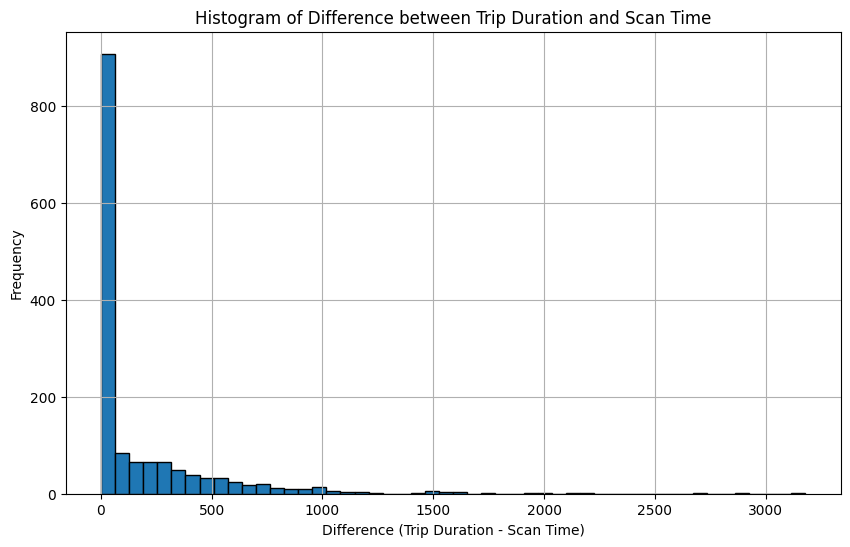

In [522]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_hypo_test1["diff_trip_duration_scan"], bins=50, edgecolor='black')
plt.xlabel("Difference (Trip Duration - Scan Time)")
plt.ylabel("Frequency")
plt.title("Histogram of Difference between Trip Duration and Scan Time")
plt.grid(True)
plt.show()

### One trip has more than 3170 min difference between trip_duration and start_scan_to_end_scan. Delhivery needs to see in detail what happened during this trip to avoid similar time delay on other trips.

In [523]:
most_delayed_trip = df_hypo_test1[df_hypo_test1["diff_trip_duration_scan"] == df_hypo_test1["diff_trip_duration_scan"].max()]
most_delayed_trip

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
1061,trip-153800006302758138,FTL,KARNATAKA,2018-09-26,PUNJAB,2018-09-29,4043.207511,864.0,3239.0,3205.0,1740.0,1856.0,2353.9412,2490.29,3179.207511


In [524]:
def remove_outliers_iqr_diff_trip_duration_scan(df_data1, column_name1):

  q1 = df_data1[column_name1].quantile(0.25)
  q3 = df_data1[column_name1].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  return df_data1[(df_data1[column_name1] >= lower_bound) & (df_data1[column_name1] <= upper_bound)]

data_without_outliers1 = remove_outliers_iqr_diff_trip_duration_scan(data_without_outliers1, 'diff_trip_duration_scan')

In [525]:
data_without_outliers1.describe()

,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,209.383548,208.870530,106.272503,105.131936,45.316893,51.758323,51.511832,57.232158,0.513018
std,145.748464,145.744057,95.337146,94.670546,40.647682,50.200913,53.953478,61.757392,0.285329
min,34.522275,34.000000,13.000000,13.000000,8.000000,8.000000,9.875900,9.880000,0.001869
25%,106.982178,106.500000,48.000000,47.000000,21.000000,22.000000,23.920000,25.395000,0.270905
50%,163.819861,163.000000,72.000000,72.000000,32.000000,35.000000,34.297200,36.880000,0.522022
75%,264.813445,264.500000,123.000000,122.500000,54.000000,58.000000,51.130650,57.290000,0.764701
max,746.165287,746.000000,637.000000,635.000000,309.000000,400.000000,432.601100,557.310000,0.998866


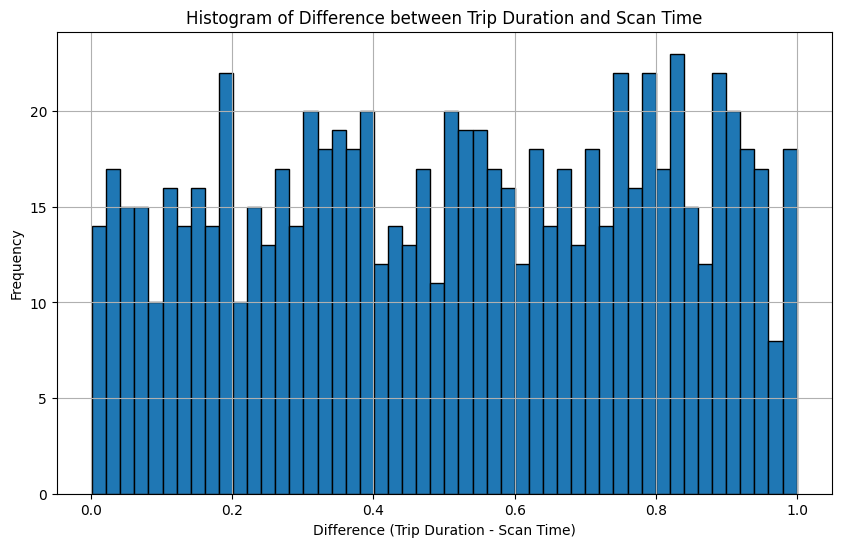

In [526]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data_without_outliers1["diff_trip_duration_scan"], bins=50, edgecolor='black')
plt.xlabel("Difference (Trip Duration - Scan Time)")
plt.ylabel("Frequency")
plt.title("Histogram of Difference between Trip Duration and Scan Time")
plt.grid(True)
plt.show()

### One trip has more than 850min difference between trip_duration and start_scan_to_end_scan. Delhivery needs to see in detail what happened during this trip since it is not even an outlier.

In [527]:
most_delayed_trip = data_without_outliers1[data_without_outliers1["diff_trip_duration_scan"] == data_without_outliers1["diff_trip_duration_scan"].max()]
most_delayed_trip

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
474,trip-153725642639839307,Carting,HARYANA,2018-09-18,HARYANA,2018-09-18,142.998866,142.0,126.0,125.0,65.0,63.0,77.8918,64.94,0.998866


In [528]:
from scipy import stats
t_statistic, p_value = stats.ttest_rel(data_without_outliers1["trip_duration"], data_without_outliers1["start_scan_to_end_scan"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of trip_duration and start_scan_to_end_scan.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of trip_duration and start_scan_to_end_scan.")

t-statistic: 51.203230662118635
p-value: 3.609026525292181e-256
Reject the null hypothesis. There is a significant difference between the means of trip_duration and start_scan_to_end_scan.


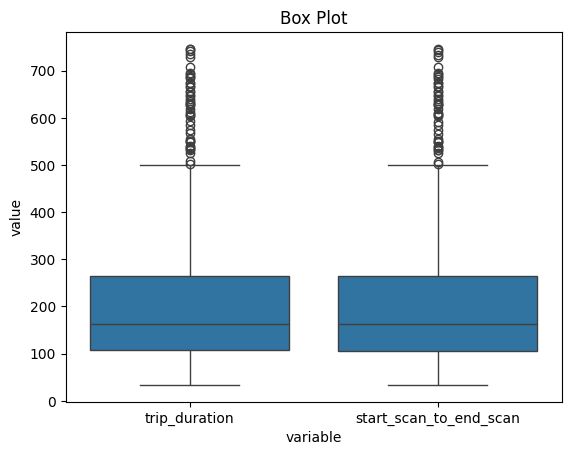

In [529]:
df_melted = pd.melt(data_without_outliers1.reset_index(), id_vars=['trip_uuid'], value_vars=['trip_duration', 'start_scan_to_end_scan'])
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Box Plot')
plt.show()

actual_time aggregated value and OSRM time aggregated value


In [530]:
df_combined_times.head()

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671191949943656,FTL,MADHYA PRADESH,2018-09-12,MADHYA PRADESH,2018-09-12,290.662270,204.0,253.0,252.0,105.0,132.0,124.5063,140.56
1,trip-153671237597058150,Carting,ASSAM,2018-09-12,ASSAM,2018-09-12,252.076999,252.0,241.0,240.0,33.0,49.0,46.9087,56.76
2,trip-153671262893947351,Carting,TELANGANA,2018-09-12,TELANGANA,2018-09-12,270.024129,210.0,195.0,195.0,26.0,26.0,30.4646,30.46
3,trip-153671277074687197,FTL,TAMIL NADU,2018-09-12,TAMIL NADU,2018-09-12,413.394632,47.0,301.0,299.0,329.0,329.0,197.6186,198.97
4,trip-153671320807895983,Carting,HARYANA,2018-09-12,HARYANA,2018-09-12,260.435888,193.0,145.0,142.0,57.0,55.0,79.9793,80.15


In [537]:

df_act_osrm_diff = df_combined_times["actual_time"] - df_combined_times["osrm_time"]
df_act_osrm_test = pd.concat([df_combined_times["actual_time"], df_combined_times["osrm_time"], df_act_osrm_diff], axis = 1)
df_act_osrm_test = df_act_osrm_test.rename(columns = {0 : "diff_actual_time_osrm_time"})
df_act_osrm_test


,actual_time,osrm_time,diff_actual_time_osrm_time
0,253.0,105.0,148.0
1,241.0,33.0,208.0
2,195.0,26.0,169.0
3,301.0,329.0,-28.0
4,145.0,57.0,88.0
...,...,...,...
1480,281.0,207.0,74.0
1481,128.0,41.0,87.0
1482,123.0,50.0,73.0
1483,62.0,28.0,34.0


In [538]:
df_act_osrm_test.describe()

,actual_time,osrm_time,diff_actual_time_osrm_time
count,1485.000000,1485.000000,1485.000000
mean,326.499663,148.139394,178.360269
std,485.997637,239.094206,267.602292
min,13.000000,8.000000,-36.000000
25%,66.000000,30.000000,31.000000
50%,142.000000,59.000000,78.000000
75%,361.000000,164.000000,201.000000
max,3916.000000,1871.000000,2368.000000


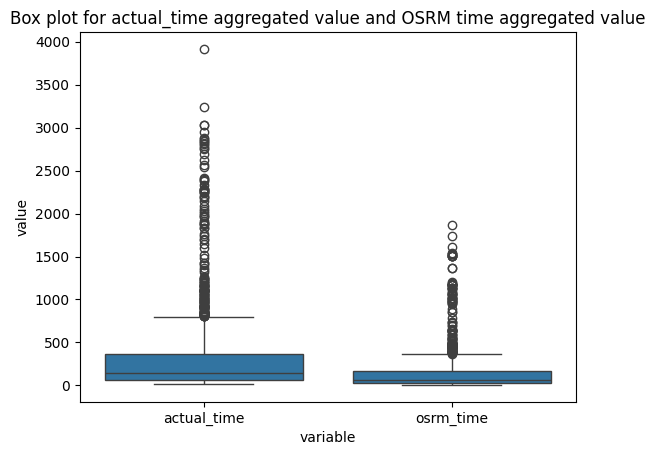

In [539]:
df_melted_1 = pd.melt(df_act_osrm_test.reset_index(), id_vars = ["index"], value_vars = ["actual_time", "osrm_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_1)

plt.title("Box plot for actual_time aggregated value and OSRM time aggregated value")
plt.show()

In [540]:
def remove_outliers_iqr_df_act_osrm_test(df_act, act_t, osrm_t):

  q1 = df_act[act_t].quantile(0.25)
  q3 = df_act[act_t].quantile(0.75)
  iqr1 = q3 - q1

  lower_bound1 = q1 - 1.5 * iqr1
  upper_bound2 = q3 + 1.5 * iqr1

  q2 = df_act[osrm_t].quantile(0.25)
  q4 = df_act[osrm_t].quantile(0.75)
  iqr2 = q4 - q2

  lower_bound3 = q2 - 1.5 * iqr2
  upper_bound4 = q4 + 1.5 * iqr2

  return df_act[((df_act[act_t] >= lower_bound1) & (df_act[act_t] <= upper_bound2) & (df_act[osrm_t] >= lower_bound3) & (df_act[osrm_t] <= upper_bound4))]

df_act_osrm_test_wo_outliers = remove_outliers_iqr_df_act_osrm_test(df_act_osrm_test, 'actual_time', 'osrm_time')

In [541]:
df_act_osrm_test_wo_outliers

,actual_time,osrm_time,diff_actual_time_osrm_time
0,253.0,105.0,148.0
1,241.0,33.0,208.0
2,195.0,26.0,169.0
3,301.0,329.0,-28.0
4,145.0,57.0,88.0
...,...,...,...
1480,281.0,207.0,74.0
1481,128.0,41.0,87.0
1482,123.0,50.0,73.0
1483,62.0,28.0,34.0


In [542]:
df_act_osrm_test_wo_outliers.describe()

,actual_time,osrm_time,diff_actual_time_osrm_time
count,1311.000000,1311.000000,1311.000000
mean,183.113654,81.676583,101.437071
std,165.065331,76.164240,106.254881
min,13.000000,8.000000,-36.000000
25%,61.000000,27.500000,28.000000
50%,115.000000,50.000000,61.000000
75%,259.000000,116.000000,144.000000
max,802.000000,364.000000,730.000000


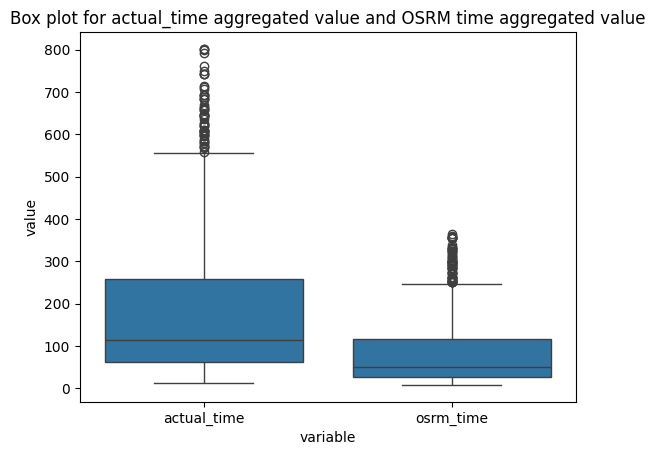

In [544]:
df_melted_2 = pd.melt(df_act_osrm_test_wo_outliers.reset_index(), id_vars = ["index"], value_vars = ["actual_time", "osrm_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_2)

plt.title("Box plot for actual_time aggregated value and OSRM time aggregated value")
plt.show()

### actual_time aggregated value and segment actual time aggregated value

In [545]:
df_atav = df.groupby(["trip_uuid", "destination_center"] )[["actual_time"]].last()
df_atav = df_atav.reset_index()
df_atav = df_atav.groupby("trip_uuid")["actual_time"].sum()
df_atav

,actual_time
trip_uuid,
trip-153671191949943656,253.0
trip-153671237597058150,241.0
trip-153671262893947351,195.0
trip-153671277074687197,301.0
trip-153671320807895983,145.0
...,...
trip-153860945742225615,281.0
trip-153860960901509071,128.0
trip-153861034802474617,123.0


In [546]:
df_atav_seg = df.groupby(["trip_uuid"])["segment_actual_time"].sum()
df_atav = df_atav.reset_index()
df_atav = df_atav.merge(df_atav_seg, left_on='trip_uuid', right_on='trip_uuid')
df_atav = df_atav.reset_index()
df_atav

,index,trip_uuid,actual_time,segment_actual_time
0,0,trip-153671191949943656,253.0,252.0
1,1,trip-153671237597058150,241.0,240.0
2,2,trip-153671262893947351,195.0,195.0
3,3,trip-153671277074687197,301.0,299.0
4,4,trip-153671320807895983,145.0,142.0
...,...,...,...,...
1480,1480,trip-153860945742225615,281.0,279.0
1481,1481,trip-153860960901509071,128.0,127.0
1482,1482,trip-153861034802474617,123.0,121.0
1483,1483,trip-153861089872028474,62.0,61.0


In [548]:
df_atav["diff_actual_time_segment_actual_time"] = df_atav["actual_time"] - df_atav["segment_actual_time"]
df_atav

,index,trip_uuid,actual_time,segment_actual_time,diff_actual_time_segment_actual_time
0,0,trip-153671191949943656,253.0,252.0,1.0
1,1,trip-153671237597058150,241.0,240.0,1.0
2,2,trip-153671262893947351,195.0,195.0,0.0
3,3,trip-153671277074687197,301.0,299.0,2.0
4,4,trip-153671320807895983,145.0,142.0,3.0
...,...,...,...,...,...
1480,1480,trip-153860945742225615,281.0,279.0,2.0
1481,1481,trip-153860960901509071,128.0,127.0,1.0
1482,1482,trip-153861034802474617,123.0,121.0,2.0
1483,1483,trip-153861089872028474,62.0,61.0,1.0


In [549]:
df_atav.describe()

,index,actual_time,segment_actual_time,diff_actual_time_segment_actual_time
count,1485.000000,1485.000000,1485.000000,1485.000000
mean,742.000000,326.499663,324.402020,2.097643
std,428.826888,485.997637,482.151456,19.538352
min,0.000000,13.000000,13.000000,-691.000000
25%,371.000000,66.000000,65.000000,1.000000
50%,742.000000,142.000000,141.000000,1.000000
75%,1113.000000,361.000000,359.000000,3.000000
max,1484.000000,3916.000000,3876.000000,40.000000


In [556]:
def remove_outliers_iqr_diff_actual_time_segment_actual_time(df_atav_out, act_t):
  q1 = df_atav_out[act_t].quantile(0.25)
  q2 = df_atav_out[act_t].quantile(0.75)
  iqr = q2 -q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q2 + 1.5 * iqr
  df_atav_out = df_atav_out[(df_atav_out[act_t] >= lower_bound) & (df_atav_out[act_t] <= upper_bound)]

  return df_atav_out

df_atav_out = remove_outliers_iqr_diff_actual_time_segment_actual_time(df_atav, "diff_actual_time_segment_actual_time")


In [557]:
df_atav_out.describe()

,index,actual_time,segment_actual_time,diff_actual_time_segment_actual_time
count,1332.000000,1332.000000,1332.000000,1332.000000
mean,744.331081,206.537538,204.900901,1.636637
std,428.862959,221.191397,220.350542,1.540374
min,0.000000,13.000000,13.000000,0.000000
25%,374.750000,62.000000,60.000000,1.000000
50%,744.500000,118.500000,118.000000,1.000000
75%,1116.250000,278.000000,275.500000,2.000000
max,1484.000000,2399.000000,2398.000000,6.000000


In [127]:
def remove_outliers_iqr_df_test3(df_atav_out, act_t, osrm_t):

  for col in df_atav_out.columns:
    q1 = df_atav_out[col].quantile(0.25)
    q2 = df_atav_out[col].quantile(0.75)
    iqr = q2 -q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q2 + 1.5 * iqr
    df_atav_out = df_atav_out[(df_atav_out[col] >= lower_bound) & (df_atav_out[col] <= upper_bound)]

    return df_atav_out

df_atav_out = remove_outliers_iqr_df_test3(df_atav, "actual_time", "segment_actual_time")


In [128]:
df_atav_out

,index,trip_uuid,actual_time,segment_actual_time
0,0,trip-153671191949943656,253.0,252.0
1,1,trip-153671237597058150,241.0,240.0
2,2,trip-153671262893947351,195.0,195.0
3,3,trip-153671277074687197,301.0,299.0
4,4,trip-153671320807895983,145.0,142.0
...,...,...,...,...
1480,1480,trip-153860945742225615,281.0,279.0
1481,1481,trip-153860960901509071,128.0,127.0
1482,1482,trip-153861034802474617,123.0,121.0
1483,1483,trip-153861089872028474,62.0,61.0


In [129]:
df_atav_out.describe()

,index,actual_time,segment_actual_time
count,1485.000000,1485.000000,1485.000000
mean,742.000000,326.499663,324.402020
std,428.826888,485.997637,482.151456
min,0.000000,13.000000,13.000000
25%,371.000000,66.000000,65.000000
50%,742.000000,142.000000,141.000000
75%,1113.000000,361.000000,359.000000
max,1484.000000,3916.000000,3876.000000


In [130]:
t_statistic, p_value = stats.ttest_rel(df_atav_out["actual_time"], df_atav_out["segment_actual_time"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of trip_duration and start_scan_to_end_scan.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of trip_duration and start_scan_to_end_scan.")

t-statistic: 4.137203612018914
p-value: 3.712929843517418e-05
Reject the null hypothesis. There is a significant difference between the means of trip_duration and start_scan_to_end_scan.


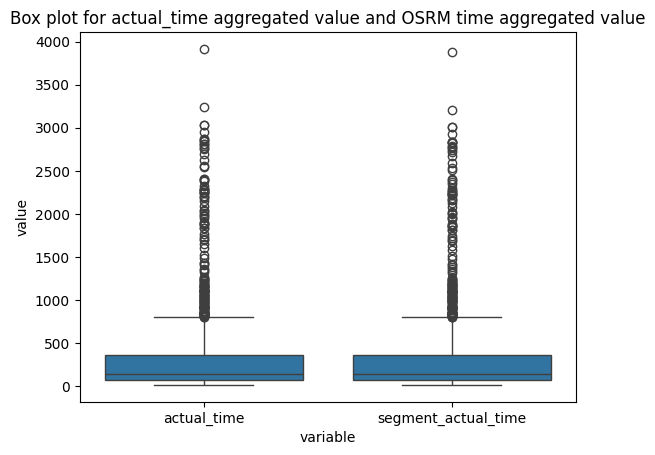

In [131]:
df_melted_2 = pd.melt(df_atav_out.reset_index(), id_vars = ["trip_uuid"], value_vars = ["actual_time", "segment_actual_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_2)

plt.title("Box plot for actual_time aggregated value and OSRM time aggregated value")
plt.show()

### osrm distance aggregated value and segment osrm distance aggregated value

In [132]:
df_odav = df.groupby(["trip_uuid", "destination_center"] )[["osrm_distance"]].last()
df_odav = df_odav.reset_index()
df_odav = df_odav.groupby("trip_uuid")["osrm_distance"].sum()
df_odav

,osrm_distance
trip_uuid,
trip-153671191949943656,124.5063
trip-153671237597058150,46.9087
trip-153671262893947351,30.4646
trip-153671277074687197,197.6186
trip-153671320807895983,79.9793
...,...
trip-153860945742225615,207.0165
trip-153860960901509071,57.1276
trip-153861034802474617,46.5093


In [133]:
df_odav_seg = df.groupby(["trip_uuid"])["segment_osrm_distance"].sum()
df_odav = df_odav.reset_index()
df_odav = df_odav.merge(df_odav_seg, left_on='trip_uuid', right_on='trip_uuid')
df_odav = df_odav.reset_index()
df_odav

,index,trip_uuid,osrm_distance,segment_osrm_distance
0,0,trip-153671191949943656,124.5063,140.5623
1,1,trip-153671237597058150,46.9087,56.7577
2,2,trip-153671262893947351,30.4646,30.4646
3,3,trip-153671277074687197,197.6186,198.9714
4,4,trip-153671320807895983,79.9793,80.1495
...,...,...,...,...
1480,1480,trip-153860945742225615,207.0165,216.3882
1481,1481,trip-153860960901509071,57.1276,67.7456
1482,1482,trip-153861034802474617,46.5093,48.5795
1483,1483,trip-153861089872028474,38.2867,33.6400


In [134]:
df_odav.describe()

,index,osrm_distance,segment_osrm_distance
count,1485.000000,1485.000000,1485.000000
mean,742.000000,185.849299,202.338645
std,428.826888,324.993838,362.936637
min,0.000000,9.875900,9.875900
25%,371.000000,31.165300,32.773000
50%,742.000000,64.845500,68.409000
75%,1113.000000,201.110100,211.231800
max,1484.000000,2553.232600,3251.105200


In [135]:
def df_odav_remove_outliers(odav, column):
    for col in columns:
      q1 = odav[col].quantile(0.25)
      q3 = odav[col].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      df_odav_clean = odav[(odav[col] >= lower_bound) & (odav[col] <= upper_bound)]

    return df_odav_clean

columns = ['osrm_distance', 'segment_osrm_distance']
df_odav_outremoved = df_odav_remove_outliers(df_odav, columns)
df_odav_outremoved

,index,trip_uuid,osrm_distance,segment_osrm_distance
0,0,trip-153671191949943656,124.5063,140.5623
1,1,trip-153671237597058150,46.9087,56.7577
2,2,trip-153671262893947351,30.4646,30.4646
3,3,trip-153671277074687197,197.6186,198.9714
4,4,trip-153671320807895983,79.9793,80.1495
...,...,...,...,...
1480,1480,trip-153860945742225615,207.0165,216.3882
1481,1481,trip-153860960901509071,57.1276,67.7456
1482,1482,trip-153861034802474617,46.5093,48.5795
1483,1483,trip-153861089872028474,38.2867,33.6400


In [136]:
df_odav_outremoved.describe()

,index,osrm_distance,segment_osrm_distance
count,1335.000000,1335.000000,1335.000000
mean,744.411236,97.510040,103.716048
std,430.404633,94.309442,99.043382
min,0.000000,9.875900,9.875900
25%,373.500000,29.196300,30.538200
50%,746.000000,51.070500,56.401500
75%,1118.500000,147.379700,153.369800
max,1484.000000,465.679700,475.432300


In [137]:
t_statistic, p_value = stats.ttest_rel(df_odav_outremoved["osrm_distance"], df_odav_outremoved["segment_osrm_distance"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of osrm_distance and segment_osrm_distance.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of osrm_distance and segment_osrm_distance.")

t-statistic: -11.882534533310556
p-value: 5.037535433816737e-31
Reject the null hypothesis. There is a significant difference between the means of osrm_distance and segment_osrm_distance.


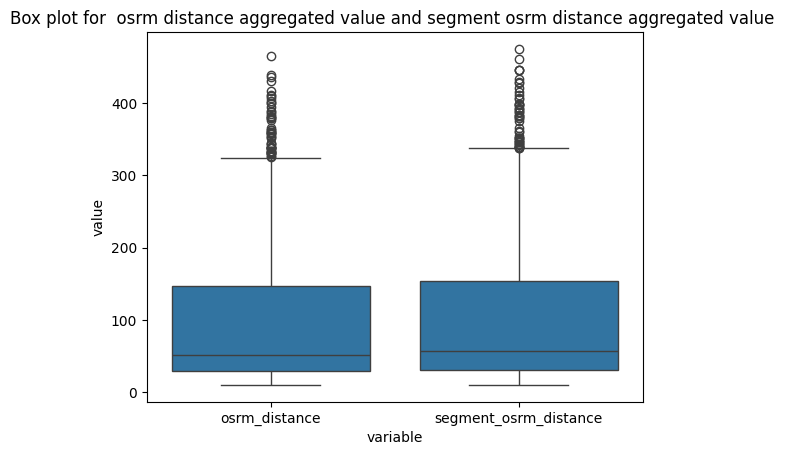

In [138]:
df_melted_3 = pd.melt(df_odav_outremoved.reset_index(), id_vars = ["trip_uuid"], value_vars = ["osrm_distance", "segment_osrm_distance"])

sns.boxplot(x = "variable", y = "value", data = df_melted_3)

plt.title("Box plot for  osrm distance aggregated value and segment osrm distance aggregated value ")
plt.show()

### hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

In [139]:
df_otav = df.groupby(["trip_uuid", "destination_center"] )[["osrm_time"]].last()
df_otav = df_otav.reset_index()
df_otav = df_otav.groupby("trip_uuid")["osrm_time"].sum()

In [140]:
df_otav_seg = df.groupby(["trip_uuid"])["segment_osrm_time"].sum()
df_otav = df_otav.reset_index()
df_otav = df_otav.merge(df_otav_seg, left_on='trip_uuid', right_on='trip_uuid')
df_otav = df_otav.reset_index()
df_otav

,index,trip_uuid,osrm_time,segment_osrm_time
0,0,trip-153671191949943656,105.0,132.0
1,1,trip-153671237597058150,33.0,49.0
2,2,trip-153671262893947351,26.0,26.0
3,3,trip-153671277074687197,329.0,329.0
4,4,trip-153671320807895983,57.0,55.0
...,...,...,...,...
1480,1480,trip-153860945742225615,207.0,213.0
1481,1481,trip-153860960901509071,41.0,47.0
1482,1482,trip-153861034802474617,50.0,50.0
1483,1483,trip-153861089872028474,28.0,33.0


In [141]:
df_otav.describe()

,index,osrm_time,segment_osrm_time
count,1485.000000,1485.000000,1485.000000
mean,742.000000,148.139394,164.983165
std,428.826888,239.094206,273.268685
min,0.000000,8.000000,8.000000
25%,371.000000,30.000000,31.000000
50%,742.000000,59.000000,65.000000
75%,1113.000000,164.000000,178.000000
max,1484.000000,1871.000000,2350.000000


In [142]:
def df_otav_remove_outliers(otav, column):
    for col in columns:
      q1 = otav[col].quantile(0.25)
      q3 = otav[col].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      df_otav_clean = otav[(otav[col] >= lower_bound) & (otav[col] <= upper_bound)]

    return df_otav_clean

columns = ['osrm_time', 'segment_osrm_time']
df_otav_outremoved = df_otav_remove_outliers(df_otav, columns)
df_otav_outremoved

,index,trip_uuid,osrm_time,segment_osrm_time
0,0,trip-153671191949943656,105.0,132.0
1,1,trip-153671237597058150,33.0,49.0
2,2,trip-153671262893947351,26.0,26.0
3,3,trip-153671277074687197,329.0,329.0
4,4,trip-153671320807895983,57.0,55.0
...,...,...,...,...
1480,1480,trip-153860945742225615,207.0,213.0
1481,1481,trip-153860960901509071,41.0,47.0
1482,1482,trip-153861034802474617,50.0,50.0
1483,1483,trip-153861089872028474,28.0,33.0


In [143]:
df_otav_outremoved.describe()

,index,osrm_time,segment_osrm_time
count,1342.000000,1342.000000,1342.000000
mean,743.848733,84.579732,92.251863
std,430.499765,78.606302,85.445182
min,0.000000,8.000000,8.000000
25%,371.500000,28.000000,29.000000
50%,743.500000,52.000000,55.500000
75%,1118.750000,123.000000,137.000000
max,1484.000000,381.000000,390.000000


In [144]:
t_statistic, p_value = stats.ttest_rel(df_otav_outremoved["osrm_time"], df_otav_outremoved["segment_osrm_time"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of osrm_time and segment_osrm_time.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of osrm_time and segment_osrm_time.")

t-statistic: -14.942002797772762
p-value: 8.225820451240303e-47
Reject the null hypothesis. There is a significant difference between the means of osrm_time and segment_osrm_time.


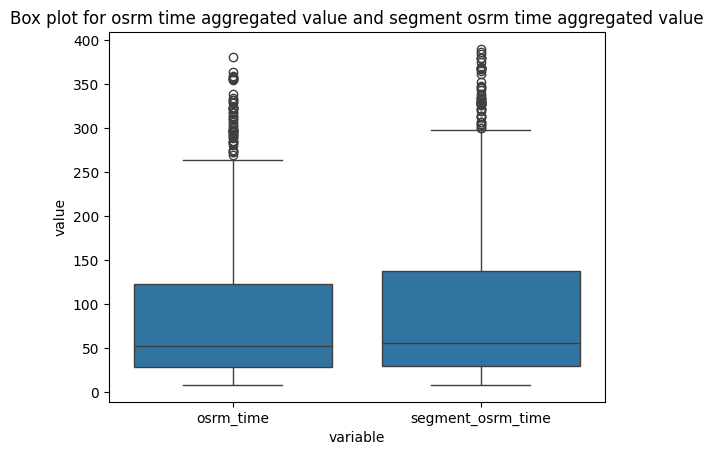

In [145]:
df_melted_4 = pd.melt(df_otav_outremoved.reset_index(), id_vars = ["trip_uuid"], value_vars = ["osrm_time", "segment_osrm_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_4)

plt.title("Box plot for osrm time aggregated value and segment osrm time aggregated value")
plt.show()

### Hot encoding of categorical variables

In [146]:
df_route_type = df.groupby("trip_uuid")["route_type"].first()
df_route_type.reset_index()
df_route_type

,route_type
trip_uuid,
trip-153671191949943656,FTL
trip-153671237597058150,Carting
trip-153671262893947351,Carting
trip-153671277074687197,FTL
trip-153671320807895983,Carting
...,...
trip-153860945742225615,FTL
trip-153860960901509071,Carting
trip-153861034802474617,Carting


In [147]:
df_route_type.value_counts()

,count
route_type,
Carting,904
FTL,581


In [148]:
df_combined_times

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671191949943656,FTL,MADHYA PRADESH,2018-09-12,MADHYA PRADESH,2018-09-12,290.662270,204.0,253.0,252.0,105.0,132.0,124.5063,140.56
1,trip-153671237597058150,Carting,ASSAM,2018-09-12,ASSAM,2018-09-12,252.076999,252.0,241.0,240.0,33.0,49.0,46.9087,56.76
2,trip-153671262893947351,Carting,TELANGANA,2018-09-12,TELANGANA,2018-09-12,270.024129,210.0,195.0,195.0,26.0,26.0,30.4646,30.46
3,trip-153671277074687197,FTL,TAMIL NADU,2018-09-12,TAMIL NADU,2018-09-12,413.394632,47.0,301.0,299.0,329.0,329.0,197.6186,198.97
4,trip-153671320807895983,Carting,HARYANA,2018-09-12,HARYANA,2018-09-12,260.435888,193.0,145.0,142.0,57.0,55.0,79.9793,80.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,trip-153860945742225615,FTL,PUNJAB,2018-10-03,PUNJAB,2018-10-04,531.677266,168.0,281.0,279.0,207.0,213.0,207.0165,216.39
1481,trip-153860960901509071,Carting,MAHARASHTRA,2018-10-03,MAHARASHTRA,2018-10-04,148.172525,148.0,128.0,127.0,41.0,47.0,57.1276,67.75
1482,trip-153861034802474617,Carting,UTTAR PRADESH,2018-10-04,UTTAR PRADESH,2018-10-04,148.794718,148.0,123.0,121.0,50.0,50.0,46.5093,48.58
1483,trip-153861089872028474,Carting,TAMIL NADU,2018-10-03,TAMIL NADU,2018-10-04,182.416663,53.0,62.0,61.0,28.0,33.0,38.2867,33.64


In [149]:
df_combined_times['route_type'] = df_combined_times['route_type'].map({'FTL':0, 'Carting':1})
df_combined_times.head()

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671191949943656,0,MADHYA PRADESH,2018-09-12,MADHYA PRADESH,2018-09-12,290.662270,204.0,253.0,252.0,105.0,132.0,124.5063,140.56
1,trip-153671237597058150,1,ASSAM,2018-09-12,ASSAM,2018-09-12,252.076999,252.0,241.0,240.0,33.0,49.0,46.9087,56.76
2,trip-153671262893947351,1,TELANGANA,2018-09-12,TELANGANA,2018-09-12,270.024129,210.0,195.0,195.0,26.0,26.0,30.4646,30.46
3,trip-153671277074687197,0,TAMIL NADU,2018-09-12,TAMIL NADU,2018-09-12,413.394632,47.0,301.0,299.0,329.0,329.0,197.6186,198.97
4,trip-153671320807895983,1,HARYANA,2018-09-12,HARYANA,2018-09-12,260.435888,193.0,145.0,142.0,57.0,55.0,79.9793,80.15


### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [150]:
df_scaled = df_combined_times.copy()
df_scaled = df_scaled.drop(columns = ["trip_uuid", "source_name", "destination_name"])
df_scaled

,route_type,trip_start_date,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,0,2018-09-12,2018-09-12,290.662270,204.0,253.0,252.0,105.0,132.0,124.5063,140.56
1,1,2018-09-12,2018-09-12,252.076999,252.0,241.0,240.0,33.0,49.0,46.9087,56.76
2,1,2018-09-12,2018-09-12,270.024129,210.0,195.0,195.0,26.0,26.0,30.4646,30.46
3,0,2018-09-12,2018-09-12,413.394632,47.0,301.0,299.0,329.0,329.0,197.6186,198.97
4,1,2018-09-12,2018-09-12,260.435888,193.0,145.0,142.0,57.0,55.0,79.9793,80.15
...,...,...,...,...,...,...,...,...,...,...,...
1480,0,2018-10-03,2018-10-04,531.677266,168.0,281.0,279.0,207.0,213.0,207.0165,216.39
1481,1,2018-10-03,2018-10-04,148.172525,148.0,128.0,127.0,41.0,47.0,57.1276,67.75
1482,1,2018-10-04,2018-10-04,148.794718,148.0,123.0,121.0,50.0,50.0,46.5093,48.58
1483,1,2018-10-03,2018-10-04,182.416663,53.0,62.0,61.0,28.0,33.0,38.2867,33.64


In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled)
df_scaled_data = pd.DataFrame(scaled_data, columns = df_scaled.columns)
df_scaled_data.head()

TypeError: float() argument must be a string or a real number, not 'datetime.date'

In [ ]:
df_scaled_data.describe()